# Easy data processing
Using the `Experiment` and `DataRun` class to generalize processing data. General usage:

1. Create an `Experiment`
2. Use the `structured_data` method to extract the parameter of interest
3. Plot

In [1]:
import sys
sys.path.append("../")
import datarun
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [2]:
#If you make a change to datarun.py, run this cell or restart your kernel
import importlib
importlib.reload(datarun)

<module 'datarun' from '/home/ben/Documents/Repos/MOTsArentForKids/MOT_loading_time/../datarun.py'>

In [3]:
d = datarun.Experiment(
    vlist = [10,20,40,60,80],
    idx_start = 164,
    datapath = "../data/mar30/load_time/",
    numtrials = 16,
    mask = .20
)


on 0: /home/ben/miniconda3/envs/science/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
        warnings.warn('Covariance of the parameters could not be estimated',


|████████████████████████████████████████| 80/80 [100%] in 1:40.3 (0.79/s)      


In [8]:
sizes = d.structure_data(lambda run : run.popt_x[2])
numbers = d.structure_data(lambda run : run.atom_number_px_sum())

In [9]:
mean_sizes = [np.mean(arr) for arr in sizes.values()]
mean_numbers = [np.mean(blah) for blah in numbers.values()]

In [10]:
err_sizes = [np.std(arr) for arr in sizes.values()]/np.sqrt(16)
err_numbers = [np.std(blah) for blah in numbers.values()]/np.sqrt(16)

<ErrorbarContainer object of 3 artists>

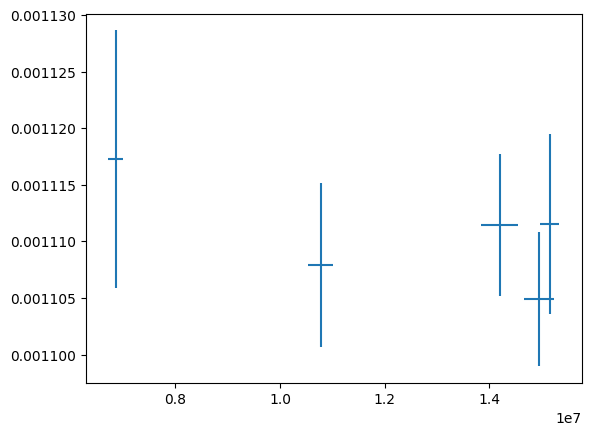

In [11]:
plt.errorbar(mean_numbers, mean_sizes, yerr = err_sizes, xerr = err_numbers, linestyle = "None")